In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The code below adds the results of predictions with the Bayesian network to the results already obtained with the other models. 

In [3]:
df_loan = pd.read_csv('results_BN\loan_remaining_time.csv')
df_metrics_BN= pd.read_csv('results_BN/metrics_BN.csv')

cols_metrics = df_metrics_BN.columns[1:]

new_cols = [
    'event_remaining_timegraph_BN_k_2',
    'event_remaining_timegraph_BN_k_3',
    'event_remaining_timegraph_BN_k_4',
    'event_remaining_timegraph_BN_k_5',
    'event_remaining_timegraph_BN_k_6',
    'event_remaining_timegraph_BN_k_7',
    'event_remaining_timegraph_BN_k_8'
]

for i, col in enumerate(new_cols):
    col_position = 4 + 3 * i
    df_loan.insert(col_position, col, df_metrics_BN.iloc[:, i+1])

df_loan.to_csv('results_BN/loan_remaining_time_with_BN.csv', index=False)

In [4]:
df_loan_rem = pd.read_csv("results_BN/loan_remaining_time_with_BN.csv")
# df_loan_tim = pd.read_csv("results/loan_next_timstamp.csv")
# df_loan_act = pd.read_csv("results/loan_next_act.csv")
# df_order_rem = pd.read_csv("results/order_remaining_time.csv")
# df_order_tim = pd.read_csv("results/order_next_timestamp.csv")
# df_order_act = pd.read_csv("results/order_next_act.csv")

the code below retrieves the scores obtained on the test data sets for each model and displays 2 graphs :
- Graph of MAE score of each model (Embed, BN, etc)
- Graph of prediction time for each model

['event_remaining_timegraph_BN_k_2', 'event_remaining_timegraph_BN_k_3', 'event_remaining_timegraph_BN_k_4', 'event_remaining_timegraph_BN_k_5', 'event_remaining_timegraph_BN_k_6', 'event_remaining_timegraph_BN_k_7', 'event_remaining_timegraph_BN_k_8']
   k  Performance            Method Model       Time
0  2     1.046449  Bayesian Network    BN  50.104720
1  3     1.052365  Bayesian Network    BN  46.803029
2  4     0.987828  Bayesian Network    BN  48.965456
3  5     0.924176  Bayesian Network    BN  36.268197
4  6     1.008995  Bayesian Network    BN  41.337744
5  7     0.957702  Bayesian Network    BN  39.998658
6  8     0.921292  Bayesian Network    BN  32.020606


C:\Windows\Temp\ipykernel_10360\3313962373.py:178: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( ['{:,.3f}'.format(x) for x in ax.get_yticks()], size = 14)
C:\Windows\Temp\ipykernel_10360\3313962373.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int (x) for x in ax.get_xticks()], size = 14)


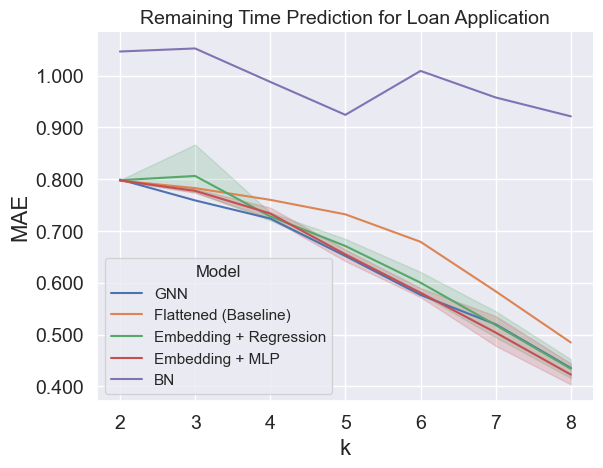

<Figure size 640x480 with 0 Axes>

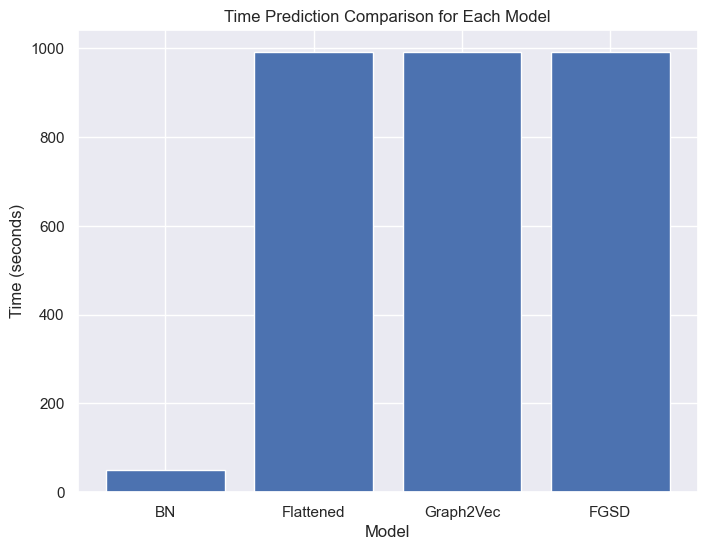

In [5]:
rel_value_df_list = []
for df, performance, target, log in [
                                    # (df_order_rem, "MAE", "Remaining Time", "Order Management"),
                                     (df_loan_rem, "MAE", "Remaining Time", "Loan Application"),
                                    #  (df_order_tim, "MAE", "Next Timestamp", "Order Management"),
                                    #  (df_loan_tim, "MAE", "Next Timestamp", "Loan Application"),
                                    # (df_loan_act, "Accuracy", "Next Activity", "Loan Application"),
                                    # (df_order_act, "Accuracy", "Next Activity", "Order Management")
                                    ]:
    cols = df.columns.to_list()[1:]
    #print(cols)
    bn_cols = [c for c in cols if "BN" in c]
    print(bn_cols)
    gnn_cols = [c for c in cols if "graph_gnn" in c]
    #print(gnn_cols)
    flat_cols = [c for c in cols if "flat_gnn" in c]
    #print(flat_cols)
    g2v_reg_cols = [c for c in cols if "reg_Graph2Vec" in c]
    #print(g2v_reg_cols)
    g2v_nn_cols = [c for c in cols if "nn_Graph2Vec" in c]
    #print(g2v_nn_cols)
    lsd_reg_cols = [c for c in cols if "reg_NetLSD" in c]
    #print(lsd_reg_cols)
    lsd_nn_cols = [c for c in cols if "nn_NetLSD" in c]
    #print(lsd_nn_cols)
    wav_reg_cols = [c for c in cols if "reg_WaveletCharacteristi" in c]
    #print(wav_reg_cols)
    wav_nn_cols = [c for c in cols if "nn_WaveletCharacteristi" in c]
    #print(wav_nn_cols)
    ldp_reg_cols = [c for c in cols if "reg_LDP" in c]
    #print(ldp_reg_cols)
    ldp_nn_cols = [c for c in cols if "nn_LDP" in c]
    #print(ldp_nn_cols)
    gl_reg_cols = [c for c in cols if "reg_GL2Vec" in c]
    #print(gl_reg_cols)
    gl_nn_cols = [c for c in cols if "nn_GL2Vec" in c]
    #print(gl_nn_cols)
    sf_reg_cols = [c for c in cols if "reg_SF" in c]
    #print(sf_reg_cols)
    sf_nn_cols = [c for c in cols if "nn_SF" in c]
    #print(sf_nn_cols)
    fgsd_reg_cols = [c for c in cols if "reg_FGSD" in c]
    #print(fgsd_reg_cols)
    fgsd_nn_cols = [c for c in cols if "nn_FGSD" in c]
    #print(fgsd_nn_cols)
    #print(df["event_remaining_timegraph_gnn_k_2"].iloc[3])
    bn_df = pd.DataFrame({
        "k":[int(c[-1]) for c in bn_cols],
        "Performance": [df[c].iloc[3] for c in bn_cols],
        "Method":["Bayesian Network" for c in bn_cols],
        "Model":["BN" for c in bn_cols],
        "Time": [df[c].iloc[4] for c in bn_cols]})
    print(bn_df)
    gnn_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gnn_cols],
        "Performance": [df[c].iloc[3] for c in gnn_cols],
        "Method":["Graph Neural Network" for c in gnn_cols],
        "Model":["GNN" for c in flat_cols]
       ,
    "Time": [df[c].iloc[4] for c in gnn_cols]})
    flat_df = pd.DataFrame({
        "k":[int(c[-1]) for c in flat_cols],
        "Performance": [df[c].iloc[3] for c in flat_cols],
        "Method":["Flattened (Baseline)" for c in flat_cols],
        "Model":["Flattened (Baseline)" for c in flat_cols]
       ,
    "Time": [df[c].iloc[4] for c in gnn_cols]})
    g2v_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in g2v_reg_cols],
        "Performance": [df[c].iloc[3] for c in g2v_reg_cols],
        "Method":["Graph2Vec" for c in g2v_reg_cols],
        "Model":["Embedding + Regression" for c in g2v_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(g2v_r_df)
    g2v_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in g2v_nn_cols],
        "Performance": [df[c].iloc[3] for c in g2v_nn_cols],
        "Method":["Graph2Vec" for c in g2v_nn_cols],
        "Model":["Embedding + MLP" for c in g2v_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(g2v_n_df)
    lsd_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in lsd_reg_cols],
        "Performance": [df[c].iloc[3] for c in lsd_reg_cols],
        "Method":["NetLSD" for c in lsd_reg_cols],
        "Model":["Embedding + Regression" for c in lsd_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(lsd_r_df)
    lsd_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in lsd_nn_cols],
        "Performance": [df[c].iloc[3] for c in lsd_nn_cols],
        "Method":["NetLSD" for c in lsd_nn_cols],
        "Model":["Embedding + MLP" for c in lsd_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(lsd_n_df)
    wav_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in wav_reg_cols],
        "Performance": [df[c].iloc[3] for c in wav_reg_cols],
        "Method":["WaveletCharacteristic" for c in wav_reg_cols],
        "Model":["Embedding + Regression" for c in wav_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(wav_r_df)
    wav_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in wav_nn_cols],
        "Performance": [df[c].iloc[3] for c in wav_nn_cols],
        "Method":["WaveletCharacteristic" for c in wav_nn_cols],
        "Model":["Embedding + MLP" for c in wav_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(wav_n_df)
    ldp_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in ldp_reg_cols],
        "Performance": [df[c].iloc[3] for c in ldp_reg_cols],
        "Method":["LDP" for c in ldp_reg_cols],
        "Model":["Embedding + Regression" for c in ldp_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(ldp_r_df)
    ldp_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in ldp_nn_cols],
        "Performance": [df[c].iloc[3] for c in ldp_nn_cols],
        "Method":["LDP" for c in ldp_nn_cols],
        "Model":["Embedding + MLP" for c in ldp_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(ldp_n_df)
    gl_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gl_reg_cols],
        "Performance": [df[c].iloc[3] for c in gl_reg_cols],
        "Method":["GL2Vec" for c in gl_reg_cols],
        "Model":["Embedding + Regression" for c in gl_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(gl_r_df)
    gl_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gl_nn_cols],
        "Performance": [df[c].iloc[3] for c in gl_nn_cols],
        "Method":["GL2Vec" for c in gl_nn_cols],
        "Model":["Embedding + MLP" for c in gl_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(gl_n_df)
    sf_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in sf_reg_cols],
        "Performance": [df[c].iloc[3] for c in sf_reg_cols],
        "Method":["SF" for c in sf_reg_cols],
        "Model":["Embedding + Regression" for c in sf_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(sf_r_df)
    sf_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in sf_nn_cols],
        "Performance": [df[c].iloc[3] for c in sf_nn_cols],
        "Method":["SF" for c in sf_nn_cols],
        "Model":["Embedding + MLP" for c in sf_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(sf_n_df)
    fgsd_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in fgsd_reg_cols],
        "Performance": [df[c].iloc[3] for c in fgsd_reg_cols],
        "Method":["FGSD" for c in fgsd_reg_cols],
        "Model":["Embedding + Regression" for c in fgsd_reg_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(fgsd_r_df)
    fgsd_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in fgsd_nn_cols],
        "Performance": [df[c].iloc[3] for c in fgsd_nn_cols],
        "Method":["FGSD" for c in fgsd_nn_cols],
        "Model":["Embedding + MLP" for c in fgsd_nn_cols],
        "Time": [df[c].iloc[4] for c in gnn_cols]})
    #print(fgsd_n_df)

    value_df = pd.concat([gnn_df,flat_df,g2v_r_df,g2v_n_df,lsd_r_df,lsd_n_df,wav_r_df,wav_n_df,ldp_r_df,ldp_n_df,gl_r_df,gl_n_df,sf_r_df,sf_n_df,fgsd_r_df,fgsd_n_df ], ignore_index = True)

    if target == "Remaining Time":
        value_df["Performance"] = value_df["Performance"].apply(lambda x: np.NaN if x>1 else x)

    # we add the BN values after the if statement to don't delete value of BN > 1
    value_df = pd.concat([value_df,bn_df], ignore_index = True)

    value_df = value_df.rename(columns={"Performance":performance})
    sns.set(font_scale=1)
    ax = sns.lineplot(x="k",y=performance, data = value_df, hue = "Model")
    ax.set_title(target+ " Prediction for "+log,size="14")
    ax.set_yticklabels( ['{:,.3f}'.format(x) for x in ax.get_yticks()], size = 14)
    ax.set_xticklabels([int (x) for x in ax.get_xticks()], size = 14)
    ax.set_xlabel(ax.get_xlabel(), size = 16)
    ax.set_ylabel(ax.get_ylabel(), size = 16)
    sns.despine(ax=ax)
    plt.savefig("results/"+log+target+"_overview.png",dpi=600,bbox_inches='tight')
    plt.show()
    plt.clf()

    models = ['BN', 'Flattened', 'Graph2Vec', 'FGSD']
    times = [bn_df['Time'].values[0], flat_df['Time'].values[0], g2v_n_df['Time'].values[0], fgsd_n_df['Time'].values[0]]
    plt.figure(figsize=(8, 6))
    plt.bar(models, times)
    plt.xlabel('Model')
    plt.ylabel('Time (seconds)')
    plt.title('Time Prediction Comparison for Each Model')
    plt.show()
